In [18]:
import sys
import os
sys.path.append('/root/capsule/code/beh_ephys_analysis')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.beh_functions import *
from aind_dynamic_foraging_data_utils.nwb_utils import load_nwb_from_filename
from aind_dynamic_foraging_basic_analysis.plot.plot_foraging_session import plot_foraging_session
from opto_tagging import opto_plotting_session
import pickle
import spikeinterface as si
%matplotlib inline

In [19]:
session = 'behavior_758017_2025-02-04_11-57-38'
data_type = 'raw'
target = 'soma'

In [24]:
session_dir = session_dirs(session)
opto_tagging_csv_dir = os.path.join(session_dir[f'opto_dir_{data_type}'], f'{session}_opto_tagging_metrics.csv') 
opto_tagging_df = pd.read_csv(opto_tagging_csv_dir)

In [25]:
# load spike times
with open(os.path.join(session_dir[f'ephys_processed_dir_{data_type}'], 'spiketimes.pkl'), 'rb') as f:
    spiketimes = pickle.load(f)
start = np.min(np.array([np.min(spiketimes[unit]) for unit in spiketimes.keys()]))
end = np.max(np.array([np.max(spiketimes[unit]) for unit in spiketimes.keys()]))
start, end

(3974340.384762423, 3978170.0082818666)

In [6]:
we = si.load_sorting_analyzer_or_waveforms(session_dir[f'postprocessed_dir_{data_type}'])
spike_amplitude = we.load_extension('spike_amplitudes').get_data(outputs="by_unit")[0]

In [33]:
spike_mean_time = [np.mean(spiketimes[unit]) if len(spiketimes[unit]) > 0 else 0 for unit in spiketimes.keys() if len(spiketimes[unit]) > 0]
sort_ind = np.argsort(spike_mean_time)

In [39]:
opto_tagging_df_focus

,unit_id,resp_p,resp_lat,powers,sites,num_pulses,durations,freqs,stim_times,opto_pass,ks_unit_id,isi_violations_ratio,firing_rate,presence_ratio,amplitude_cutoff,decoder_label,depth,euclidean_norm,correlation,default_qc
0,52,[0.45],[0.01291654],[30],['surface_LC'],[5],[4],[5],['pre'],True,52,0.000000,0.336325,0.285714,0.007374,sua,852.46,[0.03002694],[0.97450102],False
1,45,[1.],[0.0066403],[30],['surface_LC'],[5],[4],[5],['pre'],True,45,0.000000,0.666905,0.412698,0.001143,sua,692.23,[0.09144288],[0.19815641],False
2,192,[0.45],[0.01211181],[30],['surface_LC'],[5],[4],[5],['pre'],True,192,0.000000,0.161634,0.238095,0.000418,sua,854.97,[0.03045084],[0.96884112],False
3,42,[0.75],[0.01163054],[30],['surface_LC'],[5],[4],[5],['pre'],True,42,1.161648,1.060155,0.793651,0.000375,mua,685.53,[0.04154093],[0.94761646],False
4,37,[0.45],[0.01069246],[30],['surface_LC'],[5],[4],[5],['pre'],True,37,0.178128,3.892023,0.793651,0.000050,sua,605.47,[0.11890486],[-0.45471678],False
5,185,[0.45],[0.01176623],[30],['surface_LC'],[5],[4],[5],['pre'],True,185,0.077597,1.497796,0.968254,0.000141,sua,695.36,[0.04688746],[0.86298948],True
6,18,[0.75],[0.01215378],[30],['surface_LC'],[5],[4],[5],['pre'],True,18,0.014666,9.435120,0.920635,0.000007,sua,452.42,[0.05424035],[0.93622491],False
7,49,[0.45 0.95 0.4 ],[0.00871434 0.00922829 0.01025484],[30 30 50],['surface_LC' 'surface_LC' 'surface_LC'],[5 5 5],[4 4 4],[5 5 5],['post' 'pre' 'post'],True,49,0.861137,2.179585,1.000000,0.000695,noise,792.43,[0.04661389 0.04346005 nan],[0.91582252 0.96749881 nan],False
8,34,[0.55],[0.01648584],[30],['surface_LC'],[5],[4],[5],['pre'],True,34,0.000000,1.090184,0.920635,0.000157,sua,558.74,[0.02400112],[0.96438109],False
9,24,[0.45 1. 0.4 0.35],[0.01079727 0.00822266 0.01034016 0.01313665],[30 30 40 50],['surface_LC' 'surface_LC' 'surface_LC' 'surfa...,[5 5 5 5],[4 4 4 4],[5 5 5 5],['post' 'pre' 'post' 'post'],True,24,0.125681,1.664391,1.000000,0.000649,noise,501.29,[0.11486156 0.07823838 0.1061085 0.10867414],[0.74340526 0.18405317 0.67788528 0.70221082],False


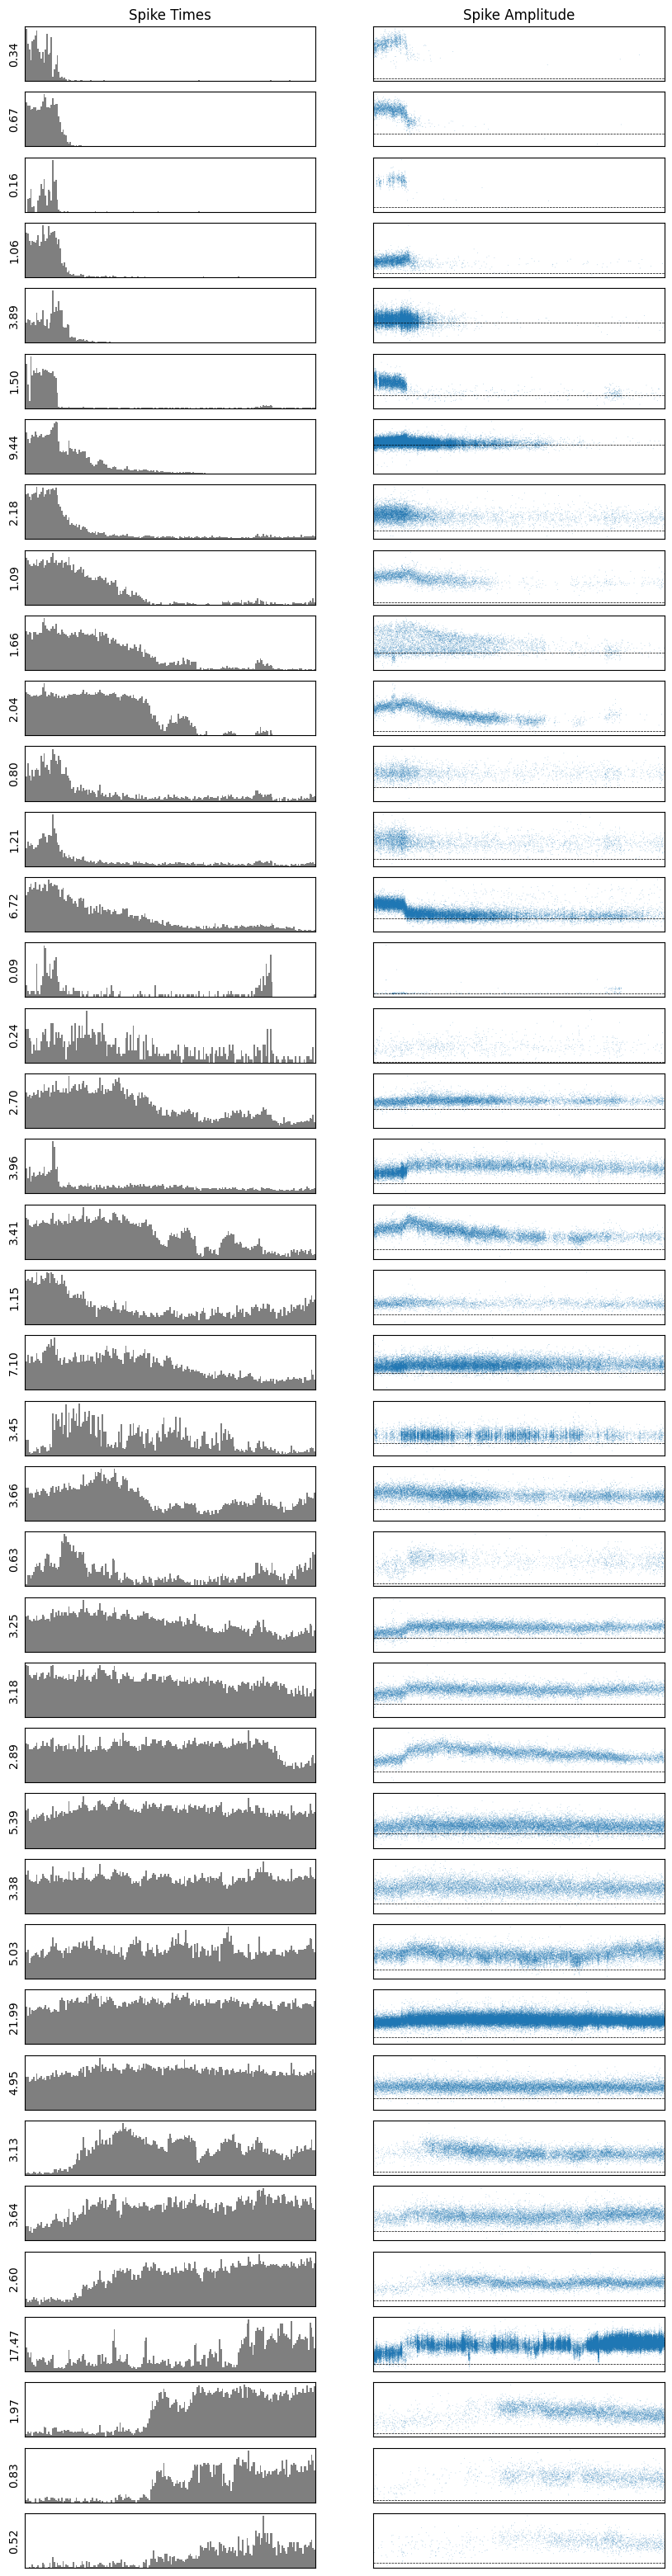

In [38]:
fig, ax = plt.subplots(np.sum(opto_tagging_df['opto_pass'].values), 2, figsize=(10, 40))
opto_tagging_df_sorted = opto_tagging_df.iloc[sort_ind].copy()
opto_tagging_df_focus = opto_tagging_df_sorted[opto_tagging_df_sorted['opto_pass'] == True].copy()
# reset index
opto_tagging_df_focus.reset_index(drop=True, inplace=True)
bins = np.linspace(start, end, 200)
for i, row in opto_tagging_df_focus.iterrows():
    ax[i, 1].scatter(spiketimes[row['unit_id']], -spike_amplitude[row['unit_id']], s=0.3, alpha = 0.5, edgecolor ='none')
    ax[i, 1].axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    if i==0:
        ax[i, 1].set_title('Spike Amplitude')
    
    # turn off ticks
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])
    ax[i, 1].set_xlim(start, end)
    
    ax[i, 0].hist(spiketimes[row['unit_id']], bins=bins, color='k', alpha=0.5, label='Spike Times')
    if i==0:
        ax[i, 0].set_title('Spike Times')
    # turn off ticks
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])
    ax[i, 0].set_xlim(start, end)
    ax[i, 0].set_ylabel(f'{row["firing_rate"]:.2f}')
plt.show(block=True)
fig.savefig(fname=os.path.join(session_dir[f'opto_dir_{data_type}'], f'{session}_opto_tagged_spike_stability.pdf'))

In [10]:
plt.scatter(spiketimes[0], spike_amplitude[0], s=1)
plt.show()

In [9]:
spike_amplitude[0]

array([-64.935   , -42.12    , -70.784996, ..., -19.89    , -30.42    ,
       -14.039999], dtype=float32)